![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Noelia's ML_OPS Project!  👻👻

###  Notebook: Recomendation System



![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Load all_ratings.csv 




![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
import pandas as pd
rating_all = pd.read_csv('../data/clean/filter/all_rating_filtered.csv', index_col=0)
rating_all.head()

,userId,score,movieId
59,4,4.0,ns5217
60,4,4.0,hs2554
61,4,4.0,ns5600
62,4,5.0,as1526
63,4,4.0,ns3136


In [2]:
# reorder
rating_all = rating_all[['userId', 'movieId','score']]
rating_all.head()


,userId,movieId,score
59,4,ns5217,4.0
60,4,hs2554,4.0
61,4,ns5600,4.0
62,4,as1526,5.0
63,4,ns3136,4.0


In [3]:
rating_all.groupby('userId')['score'].count().sort_values()

userId
16020        50
263283       50
113758       50
56285        50
56290        50
          ...  
24025      4946
70648      5356
270123     7638
8659       9279
45811     18276
Name: score, Length: 43886, dtype: int64

In [4]:
rating_all.groupby('userId')['score'].count().sort_values().describe()
# 

count    43886.000000
mean       220.680240
std        300.347957
min         50.000000
25%         76.000000
50%        124.000000
75%        245.000000
max      18276.000000
Name: score, dtype: float64

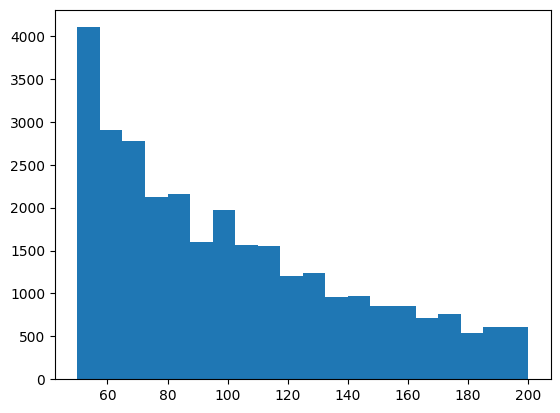

In [5]:
import matplotlib.pyplot as plt

reviews_by_users = rating_all.groupby('userId')['score'].count().sort_values()
plt.hist(reviews_by_users,bins=20,range=(50,200))
plt.show()

In [6]:
mask = (reviews_by_users >=50) & (reviews_by_users <=200)
selected_users = reviews_by_users[mask].index.tolist()
len(selected_users)

# rating_all.loc[rating_all['userId']==45811]

30069

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Distribution across score

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [7]:
selected_df = rating_all.loc[rating_all['userId'].isin(selected_users)]

vc = selected_df['score'].value_counts().sort_index()
vc


0.5     35297
1.0     87555
1.5     28709
2.0    166594
2.5     86603
3.0    600851
3.5    275486
4.0    870562
4.5    278725
5.0    599548
Name: score, dtype: int64

In [8]:
# rename selected_df by df  
df = selected_df

In [9]:
# Split in df for each review
df05 = df.loc[df['score']==0.5]
df10 = df.loc[df['score']==1]
df15 = df.loc[df['score']==1.5]
df20 = df.loc[df['score']==2]
df25 = df.loc[df['score']==2.5]
df30 = df.loc[df['score']==3]
df35 = df.loc[df['score']==3.5]
df40 = df.loc[df['score']==4]
df45 = df.loc[df['score']==4.5]
df50 = df.loc[df['score']==5]


In [10]:
# Create 10 dataframes of X or less of each class
x = 10000

dfs = []
for i in range(10):
    dff = pd.concat([df05.sample(x,replace=True),df10.sample(x,replace=True),df15.sample(x,replace=True),df20.sample(x,replace=False),
df25.sample(x,replace=True),df30.sample(x,replace=False),df35.sample(x,replace=False),df40.sample(x,replace=False),df45.sample(x,replace=False),df50.sample(x,replace=False)])
    dfs.append(dff)

In [11]:
dfs[0].shape

(100000, 3)

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Load  dataset

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [12]:

from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

# Load Dataset rating data
readers = []

for i in range(10):
    reader = Reader(rating_scale=(0.5, 5))
    readers.append(reader)
reader_F = Reader(rating_scale=(0.5, 5))

dps = []
for i in range(10):
    dps.append(Dataset.load_from_df(dfs[i][['userId', 'movieId', 'score']], readers[i]))
dps_F = Dataset.load_from_df(df[['userId', 'movieId', 'score']], reader_F)

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Split in train / test

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [13]:
# Split in train, test

train_test_sets = []
for dp in dps:
    train1, test1 = train_test_split(dp, test_size = 0.15)
    train_test_sets.append((train1,test1))
    
train_F, test_F = train_test_split(dps_F, test_size = 0.15)

In [14]:
len(train_test_sets)

10

In [21]:
import gc

gc.collect()

0

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Create the model

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [22]:
models = []

for i in range(10):
    m1 = SVD(n_factors=50, n_epochs=20, lr_all=0.005, reg_all=0.01)
    models.append(m1)

model_F = SVD(n_factors=50, n_epochs=20, lr_all=0.005, reg_all=0.01)

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Train the models on train datasets

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [23]:
for idx, m1 in enumerate(models):
    m1.fit(train_test_sets[i][0])
model_F.fit(train_F)

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Predict for 1 user, 1 movie

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [17]:
option1 = {
    'userId':66575,
    'movieId':'ns5785',
    'score':1.5
}

option2= {
    'userId':258545,
    'movieId':'as922',
    'score':0.5
}

option3= {
    'userId':118361,
    'movieId':'as8025',
    'score':3.5
}

option4= {
    'userId':7793,
    'movieId':'ns7444',
    'score':5.0
}

options = [option1,option2,option3,option4]

In [30]:
j=1

userId=options[j]['userId']
movieId =options[j]['movieId']
preds = []
for i in range(10):
    p1 = models[i].predict(userId, movieId).est
    preds.append(p1)
pred_F = model_F.predict(userId, movieId).est
for pred in preds:
    print("prediction --> ", pred)
print("pred_F --> ", pred_F)
print("------------------------------------------------")
print("True score --> ", options[j]['score'])
print("------------------------------------------------")

prediction -->  2.0643302047807546
prediction -->  1.9857975092882394
prediction -->  1.9959526187099628
prediction -->  1.927535052662561
prediction -->  2.0536015043795626
prediction -->  2.036945101335693
prediction -->  2.0107539541209087
prediction -->  1.9638260486222265
prediction -->  1.936246445088819
prediction -->  1.9020039497001744
pred_F -->  2.759110333861534
------------------------------------------------
True score -->  0.5
------------------------------------------------


![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Predict using an ensemble
![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)



In [280]:
import numpy as np
def make_ensemble_predictions(userId, movieId):
    preds = []
    for i in range(10):
        p1 = models[i].predict(userId, movieId).est
        preds.append(p1)
    
   
    preds = np.array(preds)
    votes = preds>2.5
    nvotes = np.count_nonzero(votes)
    if nvotes>4:
        return "Recomended Movie"
    else:
        return "not recommended Movie"

In [285]:
make_ensemble_predictions(userId, movieId)

'Recomended Movie'

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### rmse across all test set
![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [286]:
from surprise import accuracy
# Calcular las predicciones sobre los datos de prueba

all_preds = []
for idx, model in enumerate(models):
    all_preds.append(model.test(train_test_sets[i][1]))

all_rmse = []
for p in all_preds:
    all_rmse.append(accuracy.rmse(p))

RMSE: 1.2439
RMSE: 1.2438
RMSE: 1.2439
RMSE: 1.2439
RMSE: 1.2438
RMSE: 1.2439
RMSE: 1.2438
RMSE: 1.2440
RMSE: 1.2438
RMSE: 1.2439


![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Save the model

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [287]:
import pickle
import os

# Individual

root_path = '../data/models/ensamble1/'
isExist = os.path.exists(root_path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(root_path)

for idx, m in enumerate(models):
    with open(root_path+'m'+str(idx)+'.pkl', 'wb') as f:
        pickle.dump(m, f)

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### If we need to load the model
![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [ ]:
import pickle

# Cargar el modelo desde el archivo
with open('model_platform.pkl', 'rb') as f:
    model_platform = pickle.load(f)

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Save dataframe with movie title

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [18]:
dfmovie = pd.read_csv('../data/clean/all_together_with_score.csv', index_col=0)
dfmovie_mini = dfmovie[['id','title']]
dfmovie_mini = dfmovie_mini.groupby('id').first()
dfmovie_mini


,title
id,
as1,the grand seduction
as10,david's mother
as100,wilder napalm
as1000,sinbad: make me wanna holla
as1001,simple gifts: the chamber music society at sha...
...,...
ns995,this lady called life
ns996,vizontele
ns997,homunculus


In [22]:
# Load ratings data
df_save = pd.read_csv('../data/clean/all_ratings.csv', index_col=0)

# promote id as index
df_save.set_index('movieId', inplace=True)

# Assign a new column name
df_save = df_save.assign(title = dfmovie_mini)

# Reset index
df_save.reset_index(inplace=True)
df_save.head()

,movieId,userId,score,title
0,as680,1,1.0,the english civil war
1,ns2186,1,4.5,latte and the magic waterstone
2,hs2381,1,5.0,la diosa coronada
3,ns3663,1,5.0,"frankenstein’s monster’s monster, frankenstein"
4,as9500,1,5.0,kept woman


In [23]:
# save complete dataframe to a file all_ratings_with_title.csv
df_save.to_csv('../data/clean/all_ratings_with_title.csv')

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Cross validation
![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [ ]:
# model_cv = SVD(n_factors=50)
# x = cross_validate(model_cv, data_platform, measures=['RMSE', 'MAE'], cv=2, verbose=True)